# Company Default Data

### Description:
The aim of this model is identify corporate lending risk for banks or financial institution. The dataset contains information of 1384 Indian companies across 11 variables for the year 2019. Using this data, we are creating a set of supervised learning models with Logistic Regression, LDA and Random Forest to predict corporate default.

### Usage
Default

### Format
A data frame with 1384 observations on the following 11 variables

***Num***: ID of each company

***Default***: Default payment in next month (1=yes, 0=no)

***Total_assets***: Total amount of assets owned by the company

***Total_income***: Total income a business receives before any taxes, expenses, adjustments, exemptions, or deductions are taken out

***PAT_as_%_of_total_income***: Profit per sales dollar after all expenses are deducted from sales

***PBDITA_as_%_of_total_income***: Profit before depreciation, income tax and amortization divided by Total income

***PBT_as_%_of_total_income***: Profit per sales dollar before all expenses are deducted from sales

***Cash_profit_as_%_of_total_income***: Profit recorded by a business that uses the cash basis of accounting (Cash Profit:Total Cash profit)

***Current_ratio***: Liquidity ratio that measures a company's ability to pay short-term obligations or those due within one year (Current assets divided by current liabilities)

***Debt_to_equity_ratio***: Leverage ratio that calculates the weight of total debt and financial liabilities against total shareholders’ equity


### Source:
Simulated data

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Financial & Risk Analytics')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


#### Importing the libraries

In [ ]:

#os.chdir('/content/drive/My Drive/Colab Notebooks/Machine Learning/Datasets')
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Financial & Risk Analytics/Company Credit Risk')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

color = sns.color_palette()
import sklearn.metrics as metrics


#### Importing the dataset

In [ ]:
Default = pd.read_csv('CompanyDefault.csv')

#Glimpse of Data
Default.head()

,Num,default,Total_assets,Total_income,PAT_as_%_of_total_income,PBDITA_as_%_of_total_income,PBT_as_%_of_total_income,Cash_profit_as_%_of_total_income,Current_ratio,Debt_to_equity_ratio
0,1,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,2,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,3,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,4,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,5,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


In [ ]:
Default.shape

(1384, 10)

#### Fixing messy column names (containing spaces) for ease of use

In [ ]:
Default.columns = Default.columns.str.replace('as_%_of', 'to')

In [ ]:
Default.head()

,Num,default,Total_assets,Total_income,PAT_to_total_income,PBDITA_to_total_income,PBT_to_total_income,Cash_profit_to_total_income,Current_ratio,Debt_to_equity_ratio
0,1,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,2,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,3,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,4,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,5,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [ ]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 1384 
The number of columns (variables) is 10


#### Data types of all variables

In [ ]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Num                          1384 non-null   int64  
 1   default                      1384 non-null   int64  
 2   Total_assets                 1384 non-null   float64
 3   Total_income                 1384 non-null   float64
 4   PAT_to_total_income          1384 non-null   float64
 5   PBDITA_to_total_income       1384 non-null   float64
 6   PBT_to_total_income          1384 non-null   float64
 7   Cash_profit_to_total_income  1384 non-null   float64
 8   Current_ratio                1384 non-null   float64
 9   Debt_to_equity_ratio         1384 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 108.2 KB


In [ ]:
Default.duplicated().sum()

0

In [ ]:
Default.drop('Num', axis = 1, inplace = True)

#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [ ]:
Default.describe()

,default,Total_assets,Total_income,PAT_to_total_income,PBDITA_to_total_income,PBT_to_total_income,Cash_profit_to_total_income,Current_ratio,Debt_to_equity_ratio
count,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000
mean,0.234104,256.762568,381.657131,-29.922088,-4.380180,-27.554086,-16.239313,1.771303,3.394933
std,0.423591,404.127921,583.461117,346.245121,218.854784,332.137949,245.587280,2.323773,11.364884
min,0.000000,0.500000,0.100000,-9700.000000,-6400.000000,-9700.000000,-6400.000000,0.000000,0.000000
25%,0.000000,25.800000,31.225000,0.000000,3.501816,0.000000,1.045456,0.880000,0.187500
50%,0.000000,103.450000,187.550000,1.464327,8.569963,2.148565,4.638115,1.230000,0.860000
75%,0.000000,296.825000,428.142581,4.075183,13.438735,5.345512,8.024023,1.942500,1.970000
max,1.000000,2275.971000,3449.826000,150.000000,100.000000,100.000000,100.000000,18.790000,90.944100


#### Now, let us check the basic measures of descriptive statistics for the categorical variables.

In [ ]:
Default["default"].value_counts()

0    1060
1     324
Name: default, dtype: int64

#### Checking proportion of default

In [ ]:
Default.default.sum() / len(Default.default)

0.23410404624277456

#### Check for missing values

In [ ]:
Default.isnull().sum()

default                        0
Total_assets                   0
Total_income                   0
PAT_to_total_income            0
PBDITA_to_total_income         0
PBT_to_total_income            0
Cash_profit_to_total_income    0
Current_ratio                  0
Debt_to_equity_ratio           0
dtype: int64

There are no missing values in the dataset.

#### Getting Top 5 rows

In [ ]:
Default.head()

,default,Total_assets,Total_income,PAT_to_total_income,PBDITA_to_total_income,PBT_to_total_income,Cash_profit_to_total_income,Current_ratio,Debt_to_equity_ratio
0,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


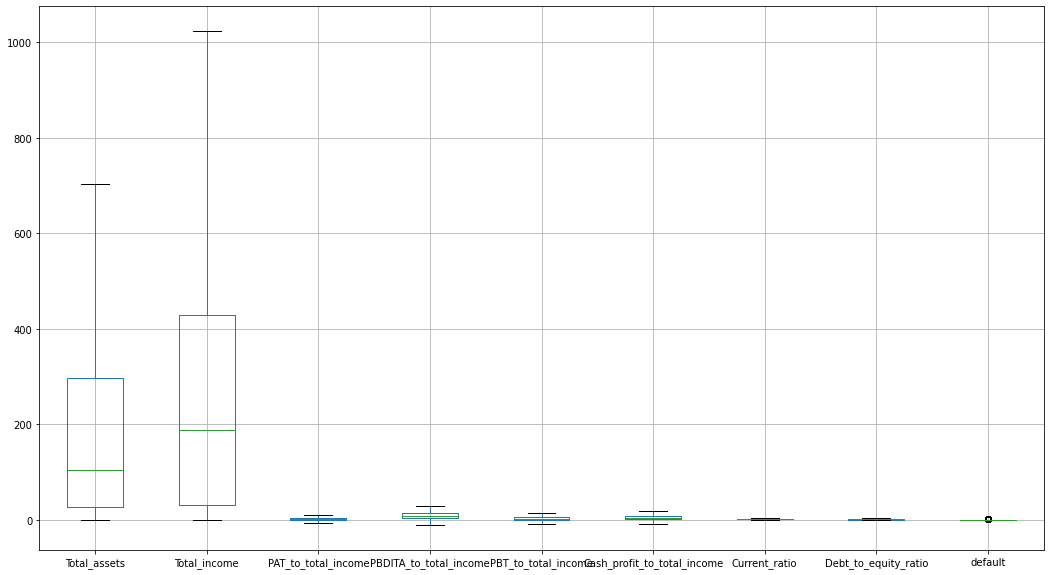

In [ ]:
plt.figure(figsize=(18,10))
Default.boxplot()

In [ ]:
Default_X = Default.drop('default', axis = 1)
Default_Y = Default['default']

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
df1.info()

NameError: ignored

In [ ]:
for column in Default_X.columns:
    lr,ur=remove_outlier(Default[column])
    Default_X[column]=np.where(Default_X[column]>ur,ur,Default_X[column])
    Default_X[column]=np.where(Default_X[column]<lr,lr,Default_X[column])

In [ ]:
Default = pd.concat([Default_X, Default_Y], axis = 1)

### Correlation heatmap

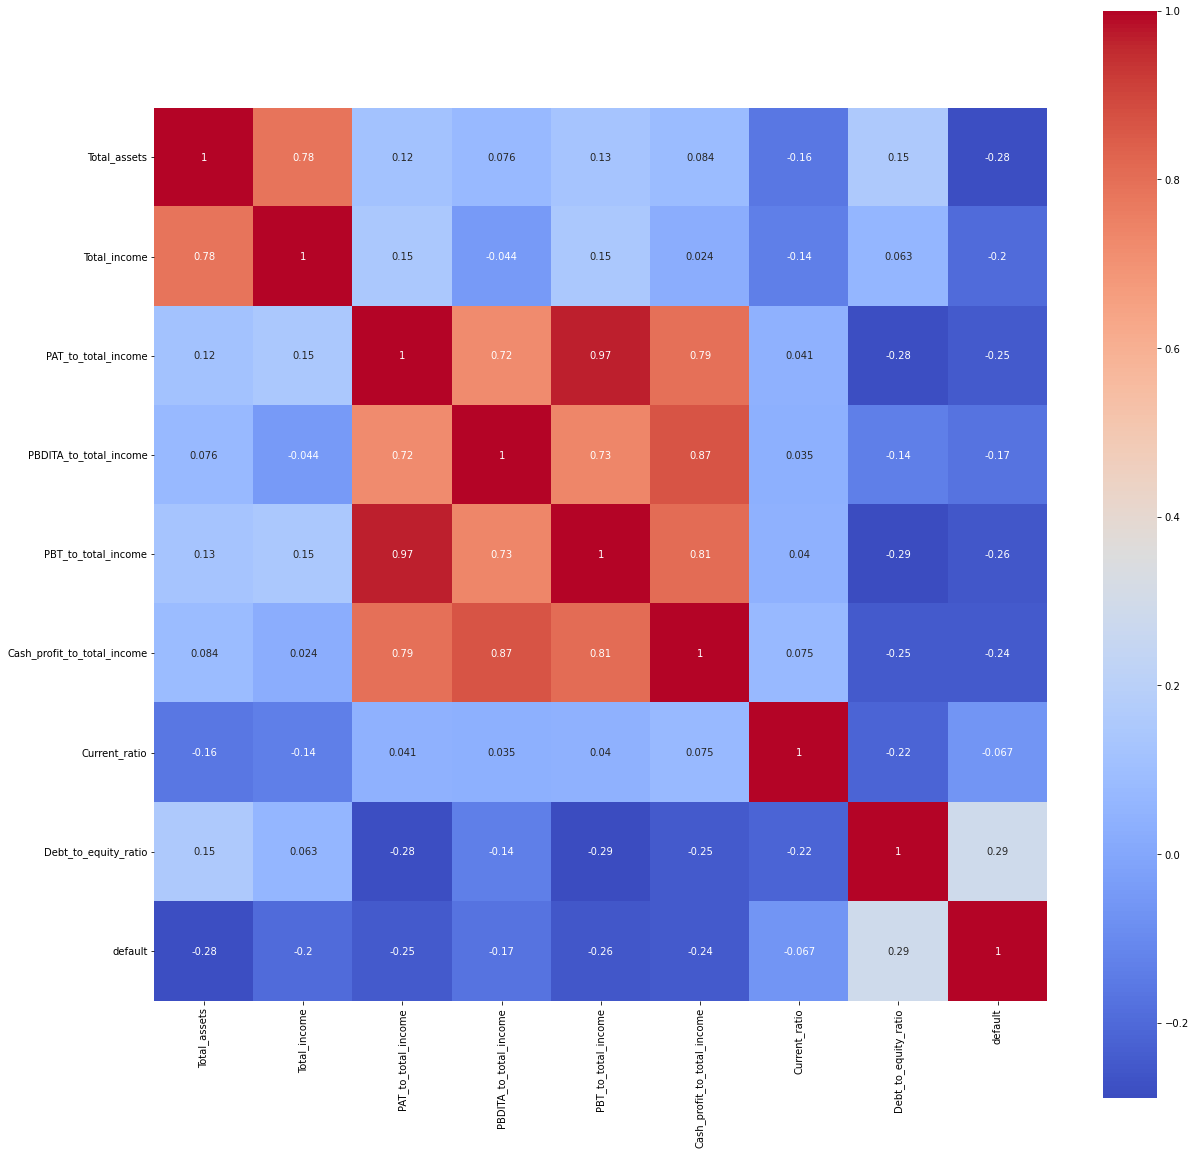

In [ ]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(20,20))  # setting the size of figure to 12 by 10
sns.heatmap(Default.corr(), annot=True,cmap='coolwarm',square=True)

- Vaiables such as PAT_as_perc_of_total_income, PBDITA_as_perc_of_total_income, PBT_as_perc_of_total_income, Cash_profit_as_perc_of_total_income  are highly correlated among themselves
- Total income & Total assets seem to be highly correlated with each other

# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

#### Now, Importing statsmodels modules

#### Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’
               data = ‘Data Frame containing the required values’).fit()

In [ ]:
import statsmodels.formula.api as SM

## Model 1

Lets check all columns we have in the dataset

In [ ]:
Default.columns

Index(['Total_assets', 'Total_income', 'PAT_to_total_income',
       'PBDITA_to_total_income', 'PBT_to_total_income',
       'Cash_profit_to_total_income', 'Current_ratio', 'Debt_to_equity_ratio',
       'default'],
      dtype='object')

In [ ]:
f_1 = 'default ~ Total_assets + Total_income + PAT_to_total_income + PBDITA_to_total_income + PBT_to_total_income + Cash_profit_to_total_income + Current_ratio + Debt_to_equity_ratio'

#### Fitting the logistic regression model on 'Default' dataset

In [ ]:
model_1 = SM.logit(formula = f_1, data=Default).fit()

Optimization terminated successfully.
         Current function value: 0.414667
         Iterations 7


#### Checking the parameters

In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 1384
Model:                          Logit   Df Residuals:                     1375
Method:                           MLE   Df Model:                            8
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.2380
Time:                        15:57:55   Log-Likelihood:                -573.90
converged:                       True   LL-Null:                       -753.16
Covariance Type:            nonrobust   LLR p-value:                 1.378e-72
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.9072      0.193     -4.693      0.000      -1.286      -0.528
Total_assets                   -0.0079      0.001    -10.203      0.000      -0.009      -0.006
Total_income                    0.0016      0.000      3.777      0.000       0.001       0.002
PAT_to_total_income             0.0406      0.068      0.601      0.548      -0.092       0.173
PBDITA_to_total_income          0.0331      0.015      2.186      0.029       0.003       0.063
PBT_to_total_income            -0.0845      0.053     -1.588      0.112      -0.189       0.020
Cash_profit_to_total_income    -0.0605      0.022     -2.757      0.006      -0.104      -0.018
Current_ratio                  -0.1658      0.081     -2.046      0.041      -0.325      -0.007
Debt_to_equity_ratio            0.4780      0.049      9.665      0.000       0.381       0.575
===============================================================================================
"""

Most of the ratio variables are insignificant. 

#### Checking the Variance Inflation Factor to treat the multicollinearity in the data

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = Default.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,PBT_to_total_income,21.102170
2,PAT_to_total_income,19.296923
5,Cash_profit_to_total_income,7.997149
3,PBDITA_to_total_income,7.834539
0,Total_assets,5.199503
1,Total_income,5.155808
6,Current_ratio,1.983593
7,Debt_to_equity_ratio,1.857565


VIF is the measure of how well an independent variable can be explained as a linear combination of other independent variables. 
A VIF of more than 5 means that the variable is more or less compensated by the other variables.

We eliminate the one with the highest VIF since thes vif starts changing between themselves after that.


In [ ]:
X = X.drop('PBT_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,Cash_profit_to_total_income,7.876186
3,PBDITA_to_total_income,7.775399
0,Total_assets,5.199503
1,Total_income,5.140456
2,PAT_to_total_income,3.500457
5,Current_ratio,1.983329
6,Debt_to_equity_ratio,1.845903


In [ ]:
X = X.drop('Cash_profit_to_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Total_assets,5.197439
1,Total_income,5.139785
3,PBDITA_to_total_income,3.914149
2,PAT_to_total_income,2.814014
4,Current_ratio,1.977934
5,Debt_to_equity_ratio,1.793156


In [ ]:
X = X.drop('Total_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,PBDITA_to_total_income,3.664134
1,PAT_to_total_income,2.758106
3,Current_ratio,1.955957
4,Debt_to_equity_ratio,1.757982
0,Total_income,1.697737


We have addressed the multicollinearity and the redundancy between the independent variables.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = Default['default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [ ]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)
Default_train.shape

(968, 6)

## Model 2

In [ ]:
model_2 = SM.logit(formula = 'default ~ PBDITA_to_total_income + PAT_to_total_income + Current_ratio + Debt_to_equity_ratio + Total_income', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.477293
         Iterations 6


#### Checking the coefficients

In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      962
Method:                           MLE   Df Model:                            5
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.1276
Time:                        15:57:56   Log-Likelihood:                -462.02
converged:                       True   LL-Null:                       -529.59
Covariance Type:            nonrobust   LLR p-value:                 1.934e-27
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.8359      0.215     -3.897      0.000      -1.256      -0.415
PBDITA_to_total_income    -0.0293      0.012     -2.368      0.018      -0.054      -0.005
PAT_to_total_income       -0.0269      0.027     -0.997      0.319      -0.080       0.026
Current_ratio             -0.1514      0.097     -1.557      0.119      -0.342       0.039
Debt_to_equity_ratio       0.3813      0.055      6.992      0.000       0.274       0.488
Total_income              -0.0017      0.000     -5.340      0.000      -0.002      -0.001
==========================================================================================
"""

PBDITA_to_total_income is an insignificant variable, therefore, we will eliminate it.

## Model 3

In [ ]:
model_3 = SM.logit(formula = 'default ~ PBDITA_to_total_income + Current_ratio + Debt_to_equity_ratio + Total_income', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.477799
         Iterations 6


#### Checking the coefficients

In [ ]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      963
Method:                           MLE   Df Model:                            4
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.1267
Time:                        15:57:56   Log-Likelihood:                -462.51
converged:                       True   LL-Null:                       -529.59
Covariance Type:            nonrobust   LLR p-value:                 5.029e-28
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7943      0.210     -3.775      0.000      -1.207      -0.382
PBDITA_to_total_income    -0.0382      0.009     -4.371      0.000      -0.055      -0.021
Current_ratio             -0.1547      0.097     -1.590      0.112      -0.345       0.036
Debt_to_equity_ratio       0.3990      0.052      7.726      0.000       0.298       0.500
Total_income              -0.0018      0.000     -5.806      0.000      -0.002      -0.001
==========================================================================================
"""

Current_ratio is still insignificant, therefore, we will eliminate it

## Model 4

Adding variables pertaining to Repayment Status

In [ ]:
model_4 = SM.logit(formula = 'default ~ PBDITA_to_total_income + Debt_to_equity_ratio + Total_income', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.479129
         Iterations 6


In [ ]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      964
Method:                           MLE   Df Model:                            3
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.1242
Time:                        15:57:56   Log-Likelihood:                -463.80
converged:                       True   LL-Null:                       -529.59
Covariance Type:            nonrobust   LLR p-value:                 2.469e-28
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.0365      0.148     -6.981      0.000      -1.327      -0.745
PBDITA_to_total_income    -0.0388      0.009     -4.430      0.000      -0.056      -0.022
Debt_to_equity_ratio       0.4148      0.051      8.171      0.000       0.315       0.514
Total_income              -0.0017      0.000     -5.717      0.000      -0.002      -0.001
==========================================================================================
"""

In [ ]:
y_prob_pred_train = model_4.predict(Default_train)
y_prob_pred_train

56      0.291112
1033    0.244220
844     0.255290
470     0.538204
1253    0.090739
          ...   
278     0.295285
432     0.459753
1283    0.112649
1265    0.058963
1277    0.071004
Length: 968, dtype: float64

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)


In [ ]:
from sklearn import metrics

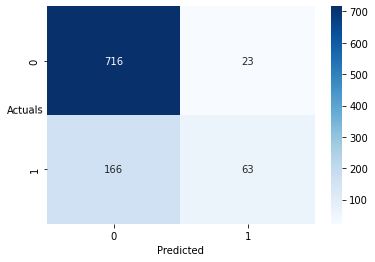

In [ ]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=1);

In [ ]:
#recall - in all the actual ones how many are really identfied ones by the model
63/229

0.27510917030567683

In [ ]:
#precision - in all the ones how many are really ones
63/86

0.7325581395348837

Not a great model overall


## Prediction on the Data

Now, let us see the predicted probability values.

In [ ]:
y_prob_pred_4 = model_4.predict()

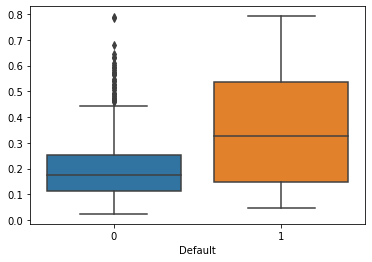

In [ ]:
sns.boxplot(x=Default_train['default'],y=y_prob_pred_4)
plt.xlabel('Default');

#### Choosing the optimal threshold

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)
thresholds

array([1.79115757, 0.79115757, 0.79084099, 0.78902106, 0.78730619,
       0.78607925, 0.68233081, 0.67930291, 0.6458995 , 0.64386686,
       0.63275413, 0.63247164, 0.63181796, 0.62973683, 0.61084341,
       0.60975932, 0.60208099, 0.60078234, 0.59506499, 0.59120659,
       0.58495431, 0.58404445, 0.57464696, 0.57328658, 0.57090529,
       0.56582866, 0.56510843, 0.56298052, 0.55310547, 0.54920227,
       0.54136709, 0.53820421, 0.5362534 , 0.53602805, 0.52855224,
       0.52674566, 0.52564658, 0.51084223, 0.51012765, 0.50394212,
       0.49999554, 0.49142656, 0.48904453, 0.48830844, 0.48689279,
       0.48111063, 0.47925206, 0.47255558, 0.47146238, 0.45975315,
       0.44518293, 0.44379348, 0.44350662, 0.44224348, 0.4409302 ,
       0.43816418, 0.436739  , 0.43206298, 0.43151833, 0.41926292,
       0.41876956, 0.40620472, 0.40140566, 0.40100894, 0.40048377,
       0.38793483, 0.38761137, 0.38673678, 0.38451852, 0.38358388,
       0.37897177, 0.37650448, 0.37467296, 0.37400678, 0.36970

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2614974083898832

#### Validating on the train set with revised threshold

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

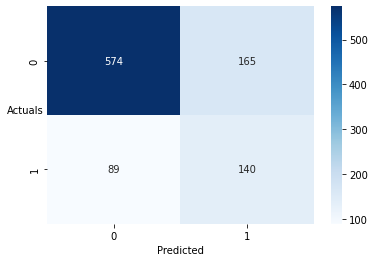

In [ ]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [ ]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.866     0.777     0.819       739
           1      0.459     0.611     0.524       229

    accuracy                          0.738       968
   macro avg      0.662     0.694     0.672       968
weighted avg      0.770     0.738     0.749       968



#### Validating on the test set

In [ ]:
y_prob_pred_test = model_4.predict(Default_test)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

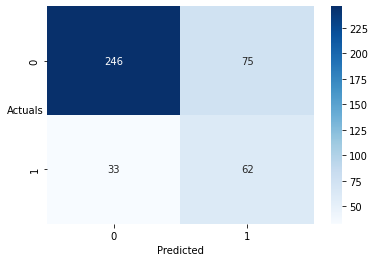

In [ ]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.882     0.766     0.820       321
           1      0.453     0.653     0.534        95

    accuracy                          0.740       416
   macro avg      0.667     0.709     0.677       416
weighted avg      0.784     0.740     0.755       416



# Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
lda_model = LDA.fit(X_train, y_train)

In [ ]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       739
           1       0.72      0.31      0.44       229

    accuracy                           0.81       968
   macro avg       0.77      0.64      0.66       968
weighted avg       0.80      0.81      0.78       968



In [ ]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       321
           1       0.67      0.37      0.48        95

    accuracy                           0.81       416
   macro avg       0.75      0.66      0.68       416
weighted avg       0.80      0.81      0.79       416



In [ ]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2834827553153811

In [ ]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

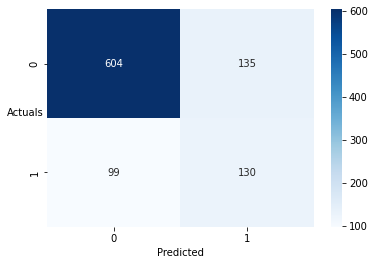

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.859     0.817     0.838       739
           1      0.491     0.568     0.526       229

    accuracy                          0.758       968
   macro avg      0.675     0.693     0.682       968
weighted avg      0.772     0.758     0.764       968



In [ ]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

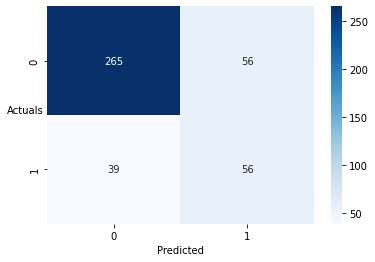

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.872     0.826     0.848       321
           1      0.500     0.589     0.541        95

    accuracy                          0.772       416
   macro avg      0.686     0.708     0.695       416
weighted avg      0.787     0.772     0.778       416



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 50}

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [ ]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       739
           1       0.81      0.62      0.70       229

    accuracy                           0.88       968
   macro avg       0.85      0.79      0.81       968
weighted avg       0.87      0.88      0.87       968



In [ ]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       321
           1       0.76      0.54      0.63        95

    accuracy                           0.86       416
   macro avg       0.82      0.74      0.77       416
weighted avg       0.85      0.86      0.85       416



### Conclusion

Amongst all the models we tried in this case Logistic Regression seems to be best aligned to our objective.

## END